# Лабораторна робота 5: Методи оптимізації

До цього моменту ви завжди використовували градієнтний спуск для оновлення параметрів і мінімізації функції витрат. У цьому зошиті ви ознайомитесь з більш просунутими методами оптимізації, які можуть прискорити навчання і, можливо, навіть привести до кращого остаточного значення функції витрат. Наявність хорошого алгоритму оптимізації може змінити все: замість днів очікування — лише кілька годин для отримання хорошого результату.

Після завершення цієї лабораторної роботи ви зможете:

* Застосовувати методи оптимізації, такі як (Стохастичний) градієнтний спуск, інерція (Momentum), RMSProp та Adam.
* Використовувати випадкові міні-батчі для прискорення збіжності та покращення оптимізації.

Градієнтний спуск "спускається вниз" по функції витрат \$J\$. Уявіть, що це щось на зразок цього: <img src="images/cost.jpg" style="width:650px;height:300px;">

<caption><center><u><b>Рисунок 1</b></u>: <b>Мінімізувати функцію витрат — це як знайти найнижчу точку в горбистій місцевості</b><br>

На кожному кроці навчання ви оновлюєте параметри, рухаючись у певному напрямку, намагаючись досягти найнижчої можливої точки.</center></caption>

**Позначення**: Як зазвичай, \$\frac{\partial J}{\partial a } = \$ `da` для будь-якої змінної `a`.

Давайте почнемо!


## Table of Contents
- [1- Packages](#1)
- [2 - Gradient Descent](#2)
    - [Exercise 1 - update_parameters_with_gd](#ex-1)
- [3 - Mini-Batch Gradient Descent](#3)
    - [Exercise 2 - random_mini_batches](#ex-2)
- [4 - Momentum](#4)
    - [Exercise 3 - initialize_velocity](#ex-3)
    - [Exercise 4 - update_parameters_with_momentum](#ex-4)
- [5 - Adam](#5)
    - [Exercise 5 - initialize_adam](#ex-5)
    - [Exercise 6 - update_parameters_with_adam](#ex-6)
- [6 - Model with different Optimization algorithms](#6)
    - [6.1 - Mini-Batch Gradient Descent](#6-1)
    - [6.2 - Mini-Batch Gradient Descent with Momentum](#6-2)
    - [6.3 - Mini-Batch with Adam](#6-3)
    - [6.4 - Summary](#6-4)
- [7 - Learning Rate Decay and Scheduling](#7)
    - [7.1 - Decay on every iteration](#7-1)
        - [Exercise 7 - update_lr](#ex-7)
    - [7.2 - Fixed Interval Scheduling](#7-2)
        - [Exercise 8 - schedule_lr_decay](#ex-8)
    - [7.3 - Using Learning Rate Decay for each Optimization Method](#7-3)
        - [7.3.1 - Gradient Descent with Learning Rate Decay](#7-3-1)
        - [7.3.2 - Gradient Descent with Momentum and Learning Rate Decay](#7-3-2)
        - [7.3.3 - Adam with Learning Rate Decay](#7-3-3)
    - [7.4 - Achieving similar performance with different methods](#7-4)

<a name='1'></a>
## 1- Packages

In [35]:
### v1.1

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from copy import deepcopy
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
Ось переклад:

---

## 2 – Градієнтний спуск

Простим методом оптимізації в машинному навчанні є **градієнтний спуск** (*Gradient Descent*, GD). Коли ви робите кроки за градієнтом, враховуючи всі \$m\$ прикладів на кожному кроці, це також називається **пакетний градієнтний спуск** (*Batch Gradient Descent*).

<a name='ex-1'></a>

### Вправа 1 – `update_parameters_with_gd`

Реалізуйте правило оновлення для градієнтного спуску. Правило градієнтного спуску таке, for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

де $L$ — кількість шарів, а $\alpha$ — швидкість навчання (*learning rate*). Усі параметри мають зберігатися в словнику `parameters`. Зверніть увагу, що ітератор `l` у циклі `for` починається з 1, оскільки перші параметри — це…
 $W^{[1]}$ and $b^{[1]}$. 

In [37]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Оновлює параметри за один крок градієнтного спуску

    Аргументи:
    parameters -- словник Python, який містить параметри для оновлення:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- словник Python, який містить градієнти для оновлення кожного параметра:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- швидкість навчання (скаляр)

    Повертає:
    parameters -- словник Python з оновленими параметрами
    """
    L = len(parameters) // 2  # кількість шарів у нейронній мережі

    # Правило оновлення для кожного параметра
    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)] 
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]

    return parameters

In [38]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
learning_rate = 0.01
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

update_parameters_with_gd_test(update_parameters_with_gd)

W1 =
[[ 1.63312395 -0.61217855 -0.5339999 ]
 [-1.06196243  0.85396039 -2.3105546 ]]
b1 =
[[ 1.73978682]
 [-0.77021546]]
W2 =
[[ 0.32587637 -0.24814147]
 [ 1.47146563 -2.05746183]
 [-0.32772076 -0.37713775]]
b2 =
[[ 1.13773698]
 [-1.09301954]
 [-0.16397615]]
All tests passed


Варіант цього методу — стохастичний градієнтний спуск (SGD), який є еквівалентом міні-батч градієнтного спуску, де кожен міні-батч містить лише один приклад. Правило оновлення, яке ви щойно реалізували, не змінюється. Змінюється лише те, що ви будете обчислювати градієнти лише для одного тренувального прикладу за раз, а не для всього тренувального набору. Наведені нижче приклади коду ілюструють різницю між стохастичним градієнтним спуском і (батчовим) градієнтним спуском.

* **(Батчовий) градієнтний спуск**:

``` python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost
    cost_total = compute_cost(a, Y)  # Cost for m training examples
    # Backward propagation
    grads = backward_propagation(a, caches, parameters)
    # Update parameters
    parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    cost_total = 0
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost_total += compute_cost(a, Y[:,j])  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters
        parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
```


У стохастичному градієнтному спуску (SGD) ви використовуєте лише один тренувальний приклад перед оновленням градієнтів. Коли тренувальний набір великий, SGD може бути швидшим. Проте параметри будуть «коливатися» в напрямку до мінімуму, замість того щоб плавно сходитися. Ось як це виглядає:

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='purple'>  : <b>SGD vs GD</b><br> "+" позначає мінімум функції вартості. SGD спричиняє багато коливань під час досягнення збіжності, але кожен крок обчислюється значно швидше, ніж у GD, оскільки використовується лише один навчальний приклад (на відміну від цілого батчу у GD).. </center></caption>

**Зауважте**, що реалізація стохастичного градієнтного спуску (SGD) потребує загалом трьох циклів `for`:

1. За кількістю ітерацій
2. За \$m\$ навчальними прикладами
3. За шарами (щоб оновити всі параметри, починаючи з  $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)

На практиці часто виходить швидше, якщо для кожного оновлення не використовувати весь навчальний набір або лише один приклад. Міні-батч градієнтний спуск (mini-batch gradient descent) використовує проміжну кількість прикладів для кожного кроку. При mini-batch градієнтному спуску ви проходите циклом по міні-батчах замість того, щоб ітерувати по кожному окремому прикладу.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u>: <font color='purple'>  <b>SGD vs Mini-Batch GD</b><br> "+" denotes a minimum of the cost. Using mini-batches in your optimization algorithm often leads to faster optimization. </center></caption>

<a name='3'></a>

## 3 - Мінi-батч градієнтний спуск (Mini-Batch Gradient Descent)

Тепер ти будеш створювати міні-батчі із тренувального набору (X, Y).

Є два кроки:

* **Перемішування (Shuffle)**: створити випадково перемішану версію тренувального набору (X, Y), як показано нижче. Кожен стовпець у X та Y — це окремий приклад для навчання. Зверни увагу, що випадкове перемішування відбувається синхронно між X і Y, так що після перемішування i-й стовпець у X відповідає i-му ярлику (label) у Y. Цей крок гарантує, що приклади будуть випадково розподілені по різних міні-батчах.


<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

* **Розбиття (Partition)**: Розділи перемішані (X, Y) на міні-батчі розміром `mini_batch_size` (тут 64). Зверни увагу, що кількість тренувальних прикладів не завжди ділиться націло на `mini_batch_size`. Тому останній міні-батч може бути меншим за розміром, але це не проблема. Коли останній міні-батч менший за повний `mini_batch_size`, він матиме такий вигляд:

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

<a name='ex-2'></a>
### Вправа 2 – `random_mini_batches`

Реалізуй `random_mini_batches`. Частина з перемішуванням вже написана для тебе! Щоб допомогти з етапом розбиття, тобі надано наступний код, який вибирає індекси для першого та другого міні-батчів:

```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Зверни увагу, що останній міні-батч може бути меншим за `mini_batch_size=64`. Нехай \$\lfloor s \rfloor\$ позначає \$s\$, округлене до меншого цілого (це `math.floor(s)` у Python). Якщо загальна кількість прикладів не ділиться націло на `mini_batch_size=64`, тоді буде
\$\left\lfloor \frac{m}{mini\_batch\_size} \right\rfloor\$ міні-батчів із повними 64 прикладами,
а кількість прикладів у фінальному міні-батчі буде
\$\left(m - mini\_batch\_size \times \left\lfloor \frac{m}{mini\_batch\_size} \right\rfloor \right)\$.

**Підказка:**

$mini\_batch\_X = shuffled\_X[:, i : j]$

Подумай, як змінна циклу `k` може допомогти збільшувати `i` та `j` кратно до `mini_batch_size`.

Як приклад, якщо хочеш збільшувати кроками по 3, можна зробити так:


```python
n = 3
for k in (0 , 5):
    print(k * n)
```

In [39]:

def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    """
    Створює список випадкових міні-батчів з (X, Y)
    
    Аргументи:
    X -- вхідні дані, розмір (розмір входу, кількість прикладів)
    Y -- правильні мітки (1 — синя точка / 0 — червона точка), розмір (1, кількість прикладів)
    mini_batch_size -- розмір міні-батчів, ціле число
    
    Повертає:
    mini_batches -- список синхронізованих пар (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # Щоб зробити "випадкові" міні-батчі повторюваними
    m = X.shape[1]                  # кількість навчальних прикладів
    mini_batches = []
        
    # Крок 1: Перемішування (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Крок 2: Розбиття (shuffled_X, shuffled_Y)
    # Випадки з повними міні-батчами, тобто по 64 приклади
    num_complete_minibatches = math.floor(m / mini_batch_size)  # кількість повних міні-батчів
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
   
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Обробка кінцевого випадку (останній міні-батч < mini_batch_size, тобто менше 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
   
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [40]:
np.random.seed(1)
mini_batch_size = 64
nx = 12288
m = 148
X = np.array([x for x in range(nx * m)]).reshape((m, nx)).T
Y = np.random.randn(1, m) < 0.5

mini_batches = random_mini_batches(X, Y, mini_batch_size)
n_batches = len(mini_batches)

assert n_batches == math.ceil(m / mini_batch_size), f"Wrong number of mini batches. {n_batches} != {math.ceil(m / mini_batch_size)}"
for k in range(n_batches - 1):
    assert mini_batches[k][0].shape == (nx, mini_batch_size), f"Wrong shape in {k} mini batch for X"
    assert mini_batches[k][1].shape == (1, mini_batch_size), f"Wrong shape in {k} mini batch for Y"
    assert np.sum(np.sum(mini_batches[k][0] - mini_batches[k][0][0], axis=0)) == ((nx * (nx - 1) / 2 ) * mini_batch_size), "Wrong values. It happens if the order of X rows(features) changes"
if ( m % mini_batch_size > 0):
    assert mini_batches[n_batches - 1][0].shape == (nx, m % mini_batch_size), f"Wrong shape in the last minibatch. {mini_batches[n_batches - 1][0].shape} != {(nx, m % mini_batch_size)}"

assert np.allclose(mini_batches[0][0][0][0:3], [294912,  86016, 454656]), "Wrong values. Check the indexes used to form the mini batches"
assert np.allclose(mini_batches[-1][0][-1][0:3], [1425407, 1769471, 897023]), "Wrong values. Check the indexes used to form the mini batches"

print("\033[92mAll tests passed!")

All tests passed!


In [41]:
t_X, t_Y, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(t_X, t_Y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

random_mini_batches_test(random_mini_batches)

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]
 All tests passed.


<font color='blue'>
 Що слід запам’ятати:

* Щоб сформувати міні-батчі, потрібно виконати два кроки: **перемішування (shuffling)** та **розбиття (partitioning)**.
* Часто як розмір міні-батча обирають **степені двійки**, наприклад: 16, 32, 64, 128.
    

<a name='4'></a>
## 4 – Імпульс (Momentum)

Оскільки градієнтний спуск із міні-батчами оновлює параметри після розгляду лише підмножини прикладів, напрямок оновлення має певну **варіативність**, і тому шлях, яким міні-батч градієнтний спуск прямує до мінімуму, буде **"коливатися"** на шляху до збіжності.
Використання імпульсу (momentum) допомагає **зменшити ці коливання**.

Імпульс враховує попередні градієнти, щоб згладити оновлення. Напрямок попередніх градієнтів зберігається у змінній \$v\$. Формально це є **експоненційно згладжене середнє** градієнтів попередніх кроків.

Також можна уявити \$v\$ як **"швидкість" кулі**, що котиться вниз по схилу — вона набирає швидкість (імпульс) відповідно до напрямку градієнта/нахилу схилу.

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'><b>Figure 3</b> </u><font color='purple'>: Червоні стрілки показують напрямок, у якому рухається один крок градієнтного спуску з імпульсом (momentum). Сині точки вказують напрямок **градієнта** (відносно поточного міні-батчу) на кожному кроці.

Замість того щоб просто слідувати градієнту, цей градієнт **впливає на змінну \$v\$**, після чого відбувається крок у напрямку, визначеному \$v\$ — тобто враховується як поточний градієнт, так і "інерція" попередніх.$v$.<br> <font color='black'> </center>


<a name='ex-3'></a>    
### Вправа 3 – initialize\_velocity

Ініціалізуй змінну швидкості. Змінна швидкості \$v\$ — це словник Python, який потрібно ініціалізувати масивами з нулів. Її ключі повинні бути такими ж, як і в словнику `grads`, а саме:
for $l =1,...,L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
```
**Примітка**: ітератор `l` у циклі `for` починається з 1, оскільки першими параметрами є `v["dW1"]` та `v["db1"]` (це «одиниця» у верхньому індексі).

In [42]:
def initialize_velocity(parameters):
    """
    Ініціалізує швидкість як словник Python з:
                - ключами: "dW1", "db1", ..., "dWL", "dbL" 
                - значеннями: масивами нулів (numpy) тієї ж форми, що й відповідні градієнти/параметри.
    
    Аргументи:
    parameters -- словник Python, який містить параметри.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Повертає:
    v -- словник Python, який містить поточну швидкість.
                    v['dW' + str(l)] = швидкість для dWl
                    v['db' + str(l)] = швидкість для dbl
    """
    
    L = len(parameters) // 2  # кількість шарів у нейронній мережі
    v = {}
    
    # Ініціалізація швидкості
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        
    return v

In [43]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

initialize_velocity_test(initialize_velocity)

v["dW1"] =
[[0. 0.]
 [0. 0.]
 [0. 0.]]
v["db1"] =
[[0.]
 [0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]
 All tests passed.


<a name='ex-4'></a>   
### Вправа 4 – update\_parameters\_with\_momentum

Тепер реалізуй оновлення параметрів із використанням імпульсу (momentum). Правило оновлення з імпульсом виглядає так: $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

Де L — кількість шарів, \$\beta\$ — коефіцієнт імпульсу (momentum), а \$\alpha\$ — швидкість навчання (learning rate). Всі параметри мають зберігатися у словнику `parameters`.

Зверни увагу, що ітератор `l` у циклі `for` починається з 1, оскільки першими параметрами є \$W^{\[1]}\$ та \$b^{\[1]}\$ (це «одиниця» у верхньому індексі).

In [44]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Оновлює параметри з використанням імпульсу (Momentum)
    
    Аргументи:
    parameters -- словник Python, що містить твої параметри:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- словник Python, що містить градієнти для кожного параметра:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- словник Python, що містить поточні швидкості:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- гіперпараметр імпульсу, скаляр
    learning_rate -- швидкість навчання, скаляр
    
    Повертає:
    parameters -- словник Python з оновленими параметрами
    v -- словник Python з оновленими швидкостями
    """

    L = len(parameters) // 2  # кількість шарів у нейронній мережі
    
    # Оновлення з імпульсом для кожного параметра
    for l in range(1, L + 1):
        
        # обчислення швидкостей
        v["dW" + str(l)] = beta * v["dW" + str(l)] + (1 - beta) * grads["dW" + str(l)]
        v["db" + str(l)] = beta * v["db" + str(l)] + (1 - beta) * grads["db" + str(l)]
        
        # оновлення параметрів
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v["db" + str(l)]
    
    return parameters, v

In [45]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

update_parameters_with_momentum_test(update_parameters_with_momentum)

W1 = 
[[ 1.62522322 -0.61179863 -0.52875457]
 [-1.071868    0.86426291 -2.30244029]]
b1 = 
[[ 1.74430927]
 [-0.76210776]]
W2 = 
[[ 0.31972282 -0.24924749]
 [ 1.46304371 -2.05987282]
 [-0.32294756 -0.38336269]]
b2 = 
[[ 1.1341662 ]
 [-1.09920409]
 [-0.171583  ]]
v["dW1"] = 
[[-0.08778584  0.00422137  0.05828152]
 [-0.11006192  0.11447237  0.09015907]]
v["db1"] = 
[[0.05024943]
 [0.09008559]]
v["dW2"] = 
[[-0.06837279 -0.01228902]
 [-0.09357694 -0.02678881]
 [ 0.05303555 -0.06916608]]
v["db2"] = v[[-0.03967535]
 [-0.06871727]
 [-0.08452056]]
 All tests passed.


**Зверніть увагу**:

* Швидкість (velocity) ініціалізується нулями. Тому алгоритму знадобиться кілька ітерацій, щоб «набрати» швидкість і почати робити більші кроки.
* Якщо \$\beta = 0\$, тоді це просто звичайний градієнтний спуск без імпульсу (momentum).

**Як обрати \$\beta\$?**

* Чим більший імпульс \$\beta\$, тим плавнішим буде оновлення, бо враховуються попередні градієнти більше. Але якщо \$\beta\$ занадто великий, це може занадто сильно згладити оновлення.
* Поширені значення \$\beta\$ лежать у діапазоні від 0.8 до 0.999. Якщо не хочеться спеціально налаштовувати цей параметр, \$\beta = 0.9\$ зазвичай є розумним вибором за замовчуванням.
* Для підбору оптимального \$\beta\$ для твоєї моделі можливо знадобиться спробувати кілька значень, щоб побачити, яке найкраще знижує значення функції вартості \$J\$.

<font color='blue'>
**Що варто запам’ятати**:

* Імпульс (momentum) враховує попередні градієнти, щоб згладити кроки градієнтного спуску. Його можна застосовувати з пакетним (batch), міні-пакетним (mini-batch) або стохастичним (stochastic) градієнтним спуском.
* Необхідно налаштувати гіперпараметри: коефіцієнт імпульсу \$\beta\$ та швидкість навчання \$\alpha\$.

<a name='5'></a>   
## 5 - Adam

Adam — один з найефективніших алгоритмів оптимізації для навчання нейронних мереж. Він поєднує ідеї з RMSProp (описаного на лекції) та імпульсу (Momentum).

**Як працює Adam?**

1. Обчислює експоненційне зважене середнє попередніх градієнтів і зберігає його у змінних \$v\$ (до корекції зсуву) та \$v^{corrected}\$ (після корекції зсуву).
2. Обчислює експоненційне зважене середнє квадратів попередніх градієнтів і зберігає його у змінних \$s\$ (до корекції зсуву) та \$s^{corrected}\$ (після корекції зсуву).
3. Оновлює параметри у напрямку, що поєднує інформацію з кроків «1» та «2».

Правило оновлення для $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
де:

* t — лічильник кроків алгоритму Adam
* L — кількість шарів
* \$\beta\_1\$ і \$\beta\_2\$ — гіперпараметри, що керують двома експоненційними зваженими середніми
* \$\alpha\$ — швидкість навчання
* \$\varepsilon\$ — дуже маленьке число, щоб уникнути ділення на нуль

Як зазвичай, всі параметри зберігаються у словнику `parameters`.

<a name='ex-5'></a>   
### Вправа 5 – initialize\_adam

Ініціалізуйте змінні Adam — \$v\$ та \$s\$, які відстежують попередню інформацію.

**Інструкція**: Змінні \$v\$ та \$s\$ — це словники Python, які потрібно ініціалізувати масивами нулів. Їхні ключі такі ж, як у `grads`, а саме:
for $l = 1, ..., L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
s["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
s["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])

```

In [46]:
def initialize_adam(parameters) :
    """
    Ініціалізує v та s як два словники Python з:
                - ключами: "dW1", "db1", ..., "dWL", "dbL" 
                - значеннями: numpy масиви нулів з такою ж формою, як відповідні градієнти/параметри.
    
    Аргументи:
    parameters -- словник Python, що містить ваші параметри.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Повертає: 
    v -- словник Python, що міститиме експоненційно зважене середнє градієнта. Ініціалізований нулями.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- словник Python, що міститиме експоненційно зважене середнє квадратів градієнта. Ініціалізований нулями.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...
                    """
    
    L = len(parameters) // 2 # кількість шарів у нейронній мережі
    v = {}
    s = {}
    
    # Ініціалізація v, s. Вхід: "parameters". Вихід: "v, s".
    for l in range(1, L + 1):
        # (прибл. 4 рядки)
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    
    return v, s


In [47]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

initialize_adam_test(initialize_adam)

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0.]
 [0. 0.]
 [0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0.]
 [0. 0.]
 [0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]
 All tests passed.


<a name='ex-6'></a>   
### Вправа 6 – update\_parameters\_with\_adam

Тепер реалізуйте оновлення параметрів за допомогою Adam. Нагадаємо, що загальне правило оновлення для \$l = 1, ..., L\$:

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$

**Зауважте**, що ітератор `l` у циклі `for` починається з 1, оскільки першими параметрами є $W^{[1]}$ та $b^{[1]}$. 

In [48]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Оновлює параметри за допомогою Adam
    
    Аргументи:
    parameters -- словник python, який містить параметри:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- словник python, який містить градієнти для кожного параметру:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- змінна Adam, ковзне середнє градієнта першого порядку, словник python
    s -- змінна Adam, ковзне середнє квадрата градієнта, словник python
    t -- змінна Adam, лічильник зроблених кроків
    learning_rate -- швидкість навчання, скаляр
    beta1 -- коефіцієнт експоненціального згладжування для оцінки першого моменту
    beta2 -- коефіцієнт експоненціального згладжування для оцінки другого моменту
    epsilon -- гіперпараметр для запобігання діленню на нуль в оновленнях Adam

    Повертає:
    parameters -- словник python з оновленими параметрами 
    v -- змінна Adam, ковзне середнє градієнта першого порядку, словник python
    s -- змінна Adam, ковзне середнє квадрата градієнта, словник python
    """
    
    L = len(parameters) // 2                 # кількість шарів у нейронній мережі
    v_corrected = {}                         # Ініціалізація скоригованої оцінки першого моменту, словник python
    s_corrected = {}                         # Ініціалізація скоригованої оцінки другого моменту, словник python
    
    # Виконання оновлення Adam для всіх параметрів
    for l in range(1, L + 1):
        # Ковзне середнє градієнтів. Вхідні дані: "v, grads, beta1". Вихідні: "v".
        # (прибл. 2 рядки)
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads["dW" + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads["db" + str(l)]
  

        # Обчислення скоригованої оцінки першого моменту. Вхідні дані: "v, beta1, t". Вихідні: "v_corrected".
        # (прибл. 2 рядки)
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - beta1**t)
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - beta1**t)
   

        # Ковзне середнє квадратів градієнтів. Вхідні дані: "s, grads, beta2". Вихідні: "s".
        #(прибл. 2 рядки)
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * (grads["dW" + str(l)]**2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * (grads["db" + str(l)]**2)


        # Обчислення скоригованої оцінки другого моменту. Вхідні дані: "s, beta2, t". Вихідні: "s_corrected".
        # (прибл. 2 рядки)
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - beta2**t)
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - beta2**t)


        # Оновлення параметрів. Вхідні дані: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Вихідні: "parameters".
        # (прибл. 2 рядки)
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v_corrected["dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v_corrected["db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon)


    return parameters, v, s, v_corrected, s_corrected


In [49]:
parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon = update_parameters_with_adam_test_case()

parameters, v, s, vc, sc  = update_parameters_with_adam(parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon)
print(f"W1 = \n{parameters['W1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b1 = \n{parameters['b1']}")
print(f"b2 = \n{parameters['b2']}")

update_parameters_with_adam_test(update_parameters_with_adam)


W1 = 
[[ 1.63937725 -0.62327448 -0.54308727]
 [-1.0578897   0.85032154 -2.31657668]]
W2 = 
[[ 0.33400549 -0.23563857]
 [ 1.47715417 -2.04561842]
 [-0.33729882 -0.36908457]]
b1 = 
[[ 1.72995096]
 [-0.7762447 ]]
b2 = 
[[ 1.14852557]
 [-1.08492339]
 [-0.15740527]]
All tests passed


**Expected values:**
    
```
W1 = 
[[ 1.63937725 -0.62327448 -0.54308727]
 [-1.0578897   0.85032154 -2.31657668]]
W2 = 
[[ 0.33400549 -0.23563857]
 [ 1.47715417 -2.04561842]
 [-0.33729882 -0.36908457]]
b1 = 
[[ 1.72995096]
 [-0.7762447 ]]
b2 = 
[[ 1.14852557]
 [-1.08492339]
 [-0.15740527]]
```

Тепер у вас є три працюючі алгоритми оптимізації (мінібатч градієнтний спуск, Моментум, Адам). Давайте реалізуємо модель з кожним із цих оптимізаторів і спостерігатимемо різницю.

<a name='6'></a>  
## 6 - Модель з різними алгоритмами оптимізації

Нижче ви використаєте датасет "moons" для тестування різних методів оптимізації. (Датасет названий "moons" — тому що дані з кожного з двох класів виглядають трохи як півмісяць.)

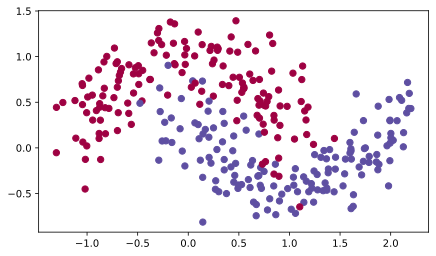

In [50]:
train_X, train_Y = load_dataset()

Для вас вже реалізована 3-шарова нейронна мережа! Ви навчите її з використанням:

* Міні-батчевого **градієнтного спуску**: буде викликатись ваша функція

  * `update_parameters_with_gd()`
* Міні-батчевого **градієнтного спуску з імпульсом (Momentum)**: будуть викликані ваші функції

  * `initialize_velocity()` та `update_parameters_with_momentum()`
* Міні-батчевого **Adam**: будуть викликані ваші функції

  * `initialize_adam()` та `update_parameters_with_adam()`

In [51]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-шарова нейронна мережа, яку можна запускати з різними оптимізаторами.
    
    Аргументи:
    X -- вхідні дані, розмірність (2, кількість прикладів)
    Y -- вектор істинних міток (1 для синьої точки / 0 для червоної), розмірність (1, кількість прикладів)
    optimizer -- оптимізатор, що використовується: градієнтний спуск, momentum або adam
    layers_dims -- список, що містить розміри кожного шару
    learning_rate -- коефіцієнт навчання, скаляр
    mini_batch_size -- розмір міні-батчу
    beta -- гіперпараметр Momentum
    beta1 -- експоненціальне згладжування для оцінок попередніх градієнтів
    beta2 -- експоненціальне згладжування для оцінок квадратів градієнтів
    epsilon -- гіперпараметр, що запобігає діленню на нуль у Adam
    num_epochs -- кількість епох навчання
    print_cost -- True, якщо потрібно друкувати вартість кожні 1000 епох

    Повертає:
    parameters -- словник Python з оновленими параметрами
    """

    L = len(layers_dims)             # кількість шарів у нейронній мережі
    costs = []                       # для відстеження вартості (cost)
    t = 0                            # лічильник, потрібний для оновлення Adam
    seed = 10                        # для відтворюваності випадкових міні-батчів
    m = X.shape[1]                   # кількість прикладів у навчанні
    
    # Ініціалізуємо параметри
    parameters = initialize_parameters(layers_dims)

    # Ініціалізація оптимізатора
    if optimizer == "gd":
        pass # ініціалізація не потрібна для градієнтного спуску
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Цикл оптимізації
    for i in range(num_epochs):
        
        # Створюємо випадкові міні-батчі. Збільшуємо seed, щоб перемішування було різним у кожній епосі
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Вибираємо міні-батч
            (minibatch_X, minibatch_Y) = minibatch

            # Пряме поширення (forward propagation)
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Обчислюємо вартість і додаємо до загальної вартості
            cost_total += compute_cost(a3, minibatch_Y)

            # Зворотне поширення (backward propagation)
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Оновлюємо параметри
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # лічильник для Adam
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Друкуємо вартість кожні 1000 епох
        if print_cost and i % 1000 == 0:
            print ("Вартість після епохи %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # Графік вартості
    plt.plot(costs)
    plt.ylabel('вартість')
    plt.xlabel('епохи (кожні 100)')
    plt.title("Коефіцієнт навчання = " + str(learning_rate))
    plt.show()

    return parameters
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-шарова нейронна мережа, яку можна запускати з різними оптимізаторами.
    
    Аргументи:
    X -- вхідні дані, розмірність (2, кількість прикладів)
    Y -- вектор істинних міток (1 для синьої точки / 0 для червоної), розмірність (1, кількість прикладів)
    optimizer -- оптимізатор, що використовується: градієнтний спуск, momentum або adam
    layers_dims -- список, що містить розміри кожного шару
    learning_rate -- коефіцієнт навчання, скаляр
    mini_batch_size -- розмір міні-батчу
    beta -- гіперпараметр Momentum
    beta1 -- експоненціальне згладжування для оцінок попередніх градієнтів
    beta2 -- експоненціальне згладжування для оцінок квадратів градієнтів
    epsilon -- гіперпараметр, що запобігає діленню на нуль у Adam
    num_epochs -- кількість епох навчання
    print_cost -- True, якщо потрібно друкувати вартість кожні 1000 епох

    Повертає:
    parameters -- словник Python з оновленими параметрами
    """

    L = len(layers_dims)             # кількість шарів у нейронній мережі
    costs = []                       # для відстеження вартості (cost)
    t = 0                            # лічильник, потрібний для оновлення Adam
    seed = 10                        # для відтворюваності випадкових міні-батчів
    m = X.shape[1]                   # кількість прикладів у навчанні
    
    # Ініціалізуємо параметри
    parameters = initialize_parameters(layers_dims)

    # Ініціалізація оптимізатора
    if optimizer == "gd":
        pass # ініціалізація не потрібна для градієнтного спуску
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Цикл оптимізації
    for i in range(num_epochs):
        
        # Створюємо випадкові міні-батчі. Збільшуємо seed, щоб перемішування було різним у кожній епосі
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Вибираємо міні-батч
            (minibatch_X, minibatch_Y) = minibatch

            # Пряме поширення (forward propagation)
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Обчислюємо вартість і додаємо до загальної вартості
            cost_total += compute_cost(a3, minibatch_Y)

            # Зворотне поширення (backward propagation)
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Оновлюємо параметри
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # лічильник для Adam
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Друкуємо вартість кожні 1000 епох
        if print_cost and i % 1000 == 0:
            print ("Вартість після епохи %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # Графік вартості
    plt.plot(costs)
    plt.ylabel('вартість')
    plt.xlabel('епохи (кожні 100)')
    plt.title("Коефіцієнт навчання = " + str(learning_rate))
    plt.show()

    return parameters


Запустіть цю 3-шарову нейронну мережу з кожним із 3 оптимізаційних методів.

<a name='6-1'></a>

### 6.1 - Міні-батч градієнтний спуск

Запустіть наступний код, щоб побачити, як модель працює з міні-батч градієнтним спуском.


Вартість після епохи 0: 0.702405
Вартість після епохи 1000: 0.668101
Вартість після епохи 2000: 0.635288
Вартість після епохи 3000: 0.600491
Вартість після епохи 4000: 0.573367


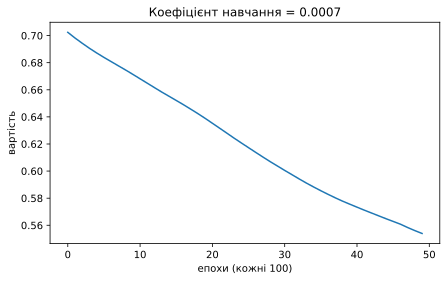

Accuracy: 0.7166666666666667


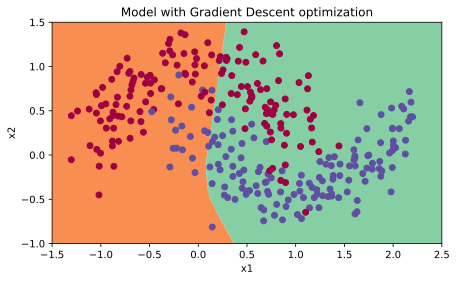

In [52]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-2'></a>  
### 6.2 - Міні-батч градієнтний спуск з моментумом

Далі, запустіть наступний код, щоб побачити, як модель працює з моментумом. Через те, що цей приклад відносно простий, вигоди від використання моментуму невеликі — але для більш складних задач ви можете побачити більші покращення.

Вартість після епохи 0: 0.702413
Вартість після епохи 1000: 0.668167
Вартість після епохи 2000: 0.635388
Вартість після епохи 3000: 0.600591
Вартість після епохи 4000: 0.573444


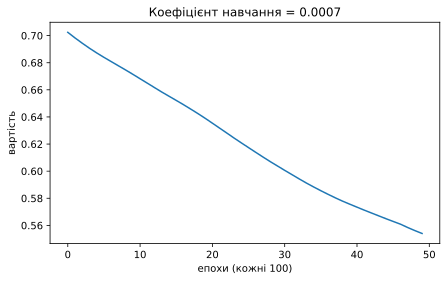

Accuracy: 0.7166666666666667


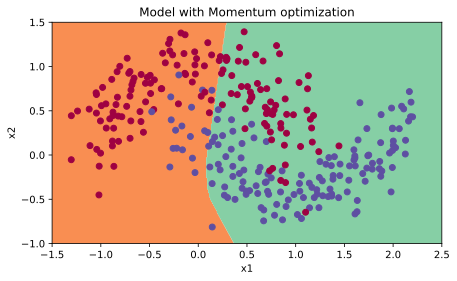

In [53]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-3'></a>  
### 6.3 - Міні-батч з Adam

Нарешті, запустіть наступний код, щоб побачити, як модель працює з Adam.

Вартість після епохи 0: 0.702166
Вартість після епохи 1000: 0.167845
Вартість після епохи 2000: 0.141316
Вартість після епохи 3000: 0.138788
Вартість після епохи 4000: 0.136066


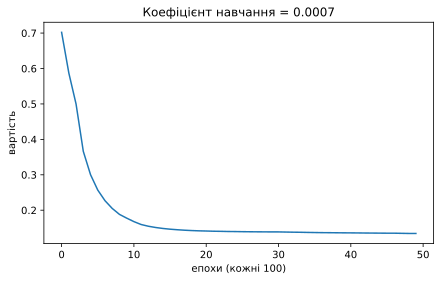

Accuracy: 0.9433333333333334


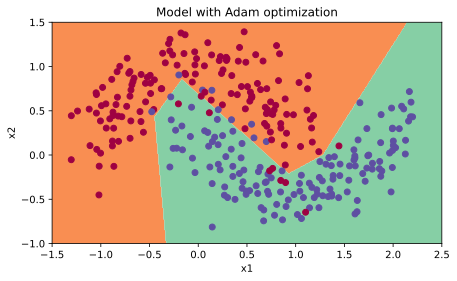

In [54]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-4'></a>  
### 6.4 - Summary

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
        <td>
        <b>cost shape</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >71%
        </td>
        <td>
        smooth
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >71%
        </td>
        <td>
        smooth
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        >94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

Зазвичай Momentum допомагає, але через малий коефіцієнт навчання та простоту датасету його вплив майже непомітний.

З іншого боку, Adam явно перевершує міні-батч градієнтний спуск та Momentum. Якщо запускати модель більше епох на цьому простому датасеті, усі три методи дадуть дуже хороші результати. Проте видно, що Adam сходиться значно швидше.

Деякі переваги Adam:

* Відносно низькі вимоги до пам’яті (хоча й вищі, ніж у градієнтного спуску та градієнтного спуску з Momentum)
* Зазвичай добре працює навіть при мінімальному налаштуванні гіперпараметрів (крім \$\alpha\$)


**References**:

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf

<a name='7'></a>  
## 7 - Зниження навчальної швидкості та планування

Останній гіперпараметр, який може допомогти прискорити навчання — це навчальна швидкість (learning rate).

На початку тренування ваша модель може робити великі кроки, але з часом фіксоване значення навчальної швидкості $\alpha$ може призвести до того, що модель буде "пружинити" в широкому коливанні і не зійдеться остаточно. Якщо ж поступово знижувати $\alpha$ з часом, то кроки будуть ставати меншими і повільнішими, що дозволить наближатися до мінімуму. Саме в цьому і полягає ідея зниження навчальної швидкості.

Зниження навчальної швидкості можна реалізувати за допомогою адаптивних методів або заздалегідь визначених планів зміни швидкості.

Тепер ви застосуєте планове зниження навчальної швидкості до 3-шарної нейронної мережі з трьома різними оптимізаторами та порівняєте, як це впливає на кожен з них, а також як різні налаштування планування змінюють результати.

Ця модель в основному така сама, як та, що ви використовували раніше, але тепер у неї додано можливість використовувати зниження навчальної швидкості. Вона містить два нові параметри: `decay` та `decay_rate`.


In [55]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay=None, decay_rate=1):
    """
    3-шарова нейронна мережа, яку можна запускати з різними оптимізаторами.
    
    Аргументи:
    X -- вхідні дані, форми (2, кількість прикладів)
    Y -- вектор істинних міток (1 для синьої точки / 0 для червоної), форми (1, кількість прикладів)
    layers_dims -- список Python, що містить розмірність кожного шару
    learning_rate -- швидкість навчання, скаляр
    mini_batch_size -- розмір міні-батчу
    beta -- гіперпараметр для моментуму
    beta1 -- коефіцієнт експоненційного згладжування для оцінки перших моментів градієнтів
    beta2 -- коефіцієнт експоненційного згладжування для оцінки других моментів градієнтів (квадратів)
    epsilon -- гіперпараметр для уникнення ділення на нуль в оновленнях Adam
    num_epochs -- кількість епох
    print_cost -- якщо True, виводити значення функції втрат кожні 1000 епох

    Повертає:
    parameters -- словник Python, що містить оновлені параметри
    """

    L = len(layers_dims)             # кількість шарів у нейронній мережі
    costs = []                       # для збереження значень функції втрат
    t = 0                            # ініціалізація лічильника кроків, необхідного для Adam
    seed = 10                        # Для відтворюваності — щоб "випадкові" міні-батчі були однаковими
    m = X.shape[1]                   # кількість прикладів у тренувальній вибірці
    lr_rates = []
    learning_rate0 = learning_rate   # початкова швидкість навчання
    
    # Ініціалізація параметрів
    parameters = initialize_parameters(layers_dims)

    # Ініціалізація оптимізатора
    if optimizer == "gd":
        pass # для градієнтного спуску ініціалізація не потрібна
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Цикл оптимізації
    for i in range(num_epochs):
        
        # Створення випадкових міні-батчів. Збільшуємо seed, щоб по-іншому перетасувати дані кожної епохи
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Вибір міні-батчу
            (minibatch_X, minibatch_Y) = minibatch

            # Пряме поширення
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Обчислення вартості і додавання до загальної суми
            cost_total += compute_cost(a3, minibatch_Y)

            # Зворотне поширення
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Оновлення параметрів
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # лічильник кроків для Adam
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        # Вивід вартості кожні 1000 епох
        if print_cost and i % 1000 == 0:
            print ("Вартість після епохи %i: %f" %(i, cost_avg))
            if decay:
                print("швидкість навчання після епохи %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # графік вартості
    plt.plot(costs)
    plt.ylabel('вартість')
    plt.xlabel('епохи (кожні 100)')
    plt.title("Швидкість навчання = " + str(learning_rate))
    plt.show()

    return parameters


<a name='7-1'></a>  
### 7.1 - Зменшення швидкості навчання на кожній ітерації

У цій частині завдання ти спробуєш один із заздалегідь визначених графіків зменшення швидкості навчання, який називається експоненційним зменшенням швидкості навчання. Він має такий математичний вигляд:

$$\alpha = \frac{1}{1 + decayRate \times epochNumber} \alpha_{0}$$

<a name='ex-7'></a>  
### Вправа 7 — оновлення швидкості навчання

Обчисліть нову швидкість навчання за допомогою експоненційного зменшення ваги.

In [56]:
def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Обчислює оновлену швидкість навчання, використовуючи експоненціальне зменшення ваги.
    
    Аргументи:
    learning_rate0 -- Початкова швидкість навчання. Скалар
    epoch_num -- Номер епохи. Ціле число
    decay_rate -- Швидкість зменшення. Скалар

    Повертає:
    learning_rate -- Оновлена швидкість навчання. Скалар
    """
    learning_rate = learning_rate0 * (1. / (1. + decay_rate * epoch_num))

    return learning_rate

In [57]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)

update_lr_test(update_lr)

Original learning rate:  0.5
Updated learning rate:  0.16666666666666666
All tests passed


Вартість після епохи 0: 0.701091
швидкість навчання після епохи 0: 0.100000
Вартість після епохи 1000: 0.661884
швидкість навчання після епохи 1000: 0.000100
Вартість після епохи 2000: 0.658620
швидкість навчання після епохи 2000: 0.000050
Вартість після епохи 3000: 0.656765
швидкість навчання після епохи 3000: 0.000033
Вартість після епохи 4000: 0.655486
швидкість навчання після епохи 4000: 0.000025


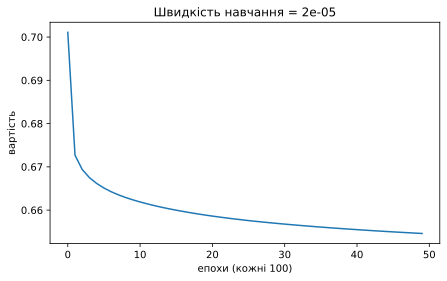

Accuracy: 0.6533333333333333


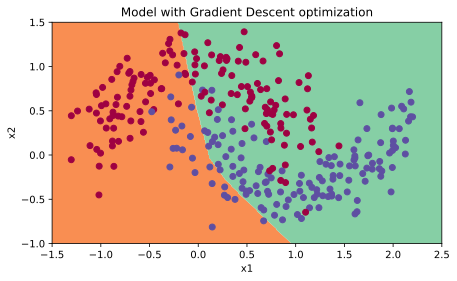

In [58]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=update_lr)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Зауважте, що якщо встановити зменшення швидкості навчання на кожній ітерації, то швидкість навчання занадто швидко прямує до нуля — навіть якщо ви починаєте з більш високого значення. 
<table> 
    <tr>
        <td>
        <b>Epoch Number</b>
        </td>
        <td>
        <b>Learning Rate</b>
        </td>
        <td>
        <b>Cost</b>
        </td>
    </tr>
    <tr>
        <td>
        0
        </td>
        <td>
        0.100000
        </td>
        <td>
        0.701091
        </td>
    </tr>
    <tr>
        <td>
        1000
        </td>
        <td>
        0.000100
        </td>
        <td>
        0.661884
        </td>
    </tr>
    <tr>
        <td>
        2000
        </td>
        <td>
        0.000050
        </td>
        <td>
        0.658620
        </td>
    </tr>
    <tr>
        <td>
        3000
        </td>
        <td>
        0.000033
        </td>
        <td>
        0.656765
        </td>
    </tr>
    <tr>
        <td>
        4000
        </td>
        <td>
        0.000025
        </td>
        <td>
        0.655486
        </td>
    </tr>
    <tr>
        <td>
        5000
        </td>
        <td>
        0.000020
        </td>
        <td>
        0.654514
        </td>
    </tr>
</table> 

Коли ви тренуєте модель лише кілька епох, це не викликає великих проблем, але коли кількість епох велика, алгоритм оптимізації припинить оновлювати параметри. Одним із поширених способів вирішення цієї проблеми є зменшення швидкості навчання через певні інтервали часу (через кілька кроків). Це називається плануванням зі сталим інтервалом (fixed interval scheduling).

<a name='7-2'></a> 
### 7.2 - Планування зі сталим інтервалом

Ви можете запобігти надто швидкому зниженню швидкості навчання до нуля, застосовуючи експоненційне зниження швидкості навчання через фіксовані проміжки часу, наприклад, кожні 1000 ітерацій. Ви можете пронумерувати ці інтервали або поділити номер епохи на розмір вікна, у якому швидкість навчання залишається сталою.

<img src="images/lr.png" style="width:400px;height:250px;">

<a name='ex-8'></a> 
### Вправа 8 - schedule\_lr\_decay

Обчисліть нову швидкість навчання, використовуючи експоненційне зниження з плануванням через фіксовані інтервали.

**Інструкції**: Реалізуйте планування швидкості навчання так, щоб вона змінювалася лише тоді, коли номер епохи (`epochNum`) є кратним розміру інтервалу (`timeInterval`).

**Примітка:** Частка у знаменнику використовує операцію округлення вниз (floor).


$$\alpha = \frac{1}{1 + decayRate \times \lfloor\frac{epochNum}{timeInterval}\rfloor} \alpha_{0}$$

**Hint:** [numpy.floor](https://numpy.org/doc/stable/reference/generated/numpy.floor.html)

In [59]:
def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Обчислює оновлену швидкість навчання, використовуючи експоненційне зниження з плануванням.

    Аргументи:
    learning_rate0 -- Початкова швидкість навчання. Скалярове значення.
    epoch_num -- Номер епохи. Ціле число.
    decay_rate -- Швидкість зниження. Скалярове значення.
    time_interval -- Кількість епох, через які оновлюється швидкість навчання.

    Повертає:
    learning_rate -- Оновлена швидкість навчання. Скалярове значення.
    """
    
    # (approx. 1 lines)
    learning_rate = learning_rate0 / (1 + decay_rate * (epoch_num // time_interval))

 
    return learning_rate


In [60]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)

epoch_num_1 = 10
epoch_num_2 = 100
decay_rate = 0.3
time_interval = 100
learning_rate_1 = schedule_lr_decay(learning_rate, epoch_num_1, decay_rate, time_interval)
learning_rate_2 = schedule_lr_decay(learning_rate, epoch_num_2, decay_rate, time_interval)
print("Updated learning rate after {} epochs: ".format(epoch_num_1), learning_rate_1)
print("Updated learning rate after {} epochs: ".format(epoch_num_2), learning_rate_2)

schedule_lr_decay_test(schedule_lr_decay)

Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846
All tests passed


**Expected output**
```
Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846
```

<a name='7-3'></a> 

### 7.3 - Використання зниження швидкості навчання для кожного методу оптимізації

Нижче ви використаєте датасет "moons" для тестування різних методів оптимізації. (Датасет названий "moons" через те, що дані кожного з двох класів трохи схожі на півмісяці.)

<a name='7-3-1'></a> 
#### 7.3.1 - Градієнтний спуск із зниженням швидкості навчання

Запустіть наступний код, щоб побачити, як модель працює з градієнтним спуском та зниженням ваги.

Вартість після епохи 0: 0.701091
швидкість навчання після епохи 0: 0.100000
Вартість після епохи 1000: 0.127161
швидкість навчання після епохи 1000: 0.050000
Вартість після епохи 2000: 0.120304
швидкість навчання після епохи 2000: 0.033333
Вартість після епохи 3000: 0.117033
швидкість навчання після епохи 3000: 0.025000
Вартість після епохи 4000: 0.117512
швидкість навчання після епохи 4000: 0.020000


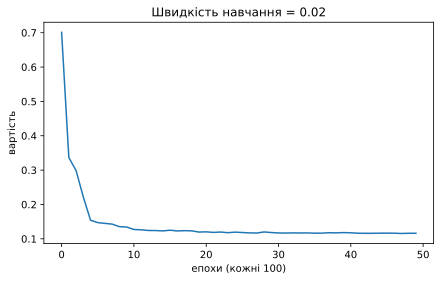

Accuracy: 0.9433333333333334


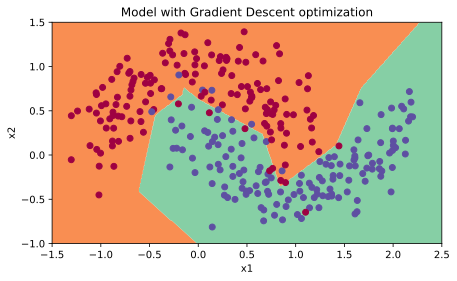

In [61]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-2'></a> 
#### 7.3.2 - Gradient Descent with Momentum and Learning Rate Decay

Run the following code to see how the model does gradient descent with momentum and weight decay.

Cost after epoch 0: 0.702226
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.128974
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.125965
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.123375
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.123218
learning rate after epoch 4000: 0.020000


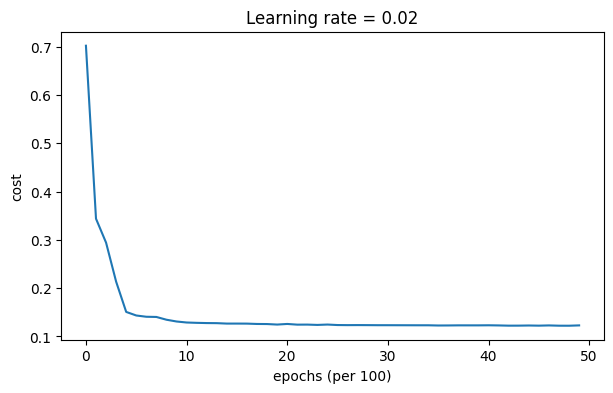

Accuracy: 0.9533333333333334


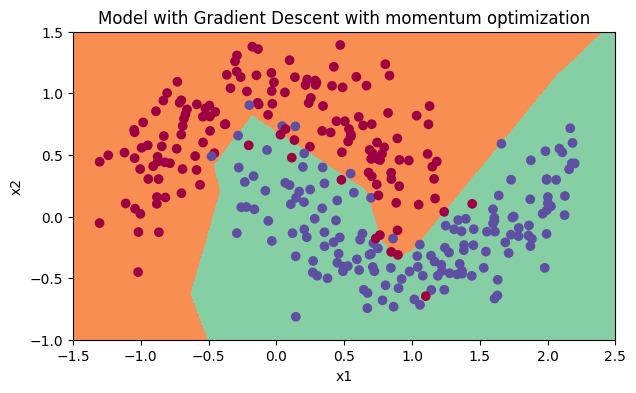

In [30]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-3'></a> 
Ось переклад:

#### 7.3.3 - Адам зі зниженням швидкості навчання

Запустіть наступний код, щоб побачити, як модель працює з Адамом та зниженням швидкості навчання.

Вартість після епохи 0: 0.699346
швидкість навчання після епохи 0: 0.010000
Вартість після епохи 1000: 0.130074
швидкість навчання після епохи 1000: 0.005000
Вартість після епохи 2000: 0.129826
швидкість навчання після епохи 2000: 0.003333
Вартість після епохи 3000: 0.129282
швидкість навчання після епохи 3000: 0.002500
Вартість після епохи 4000: 0.128361
швидкість навчання після епохи 4000: 0.002000


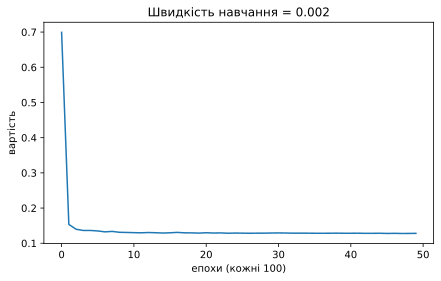

Accuracy: 0.94


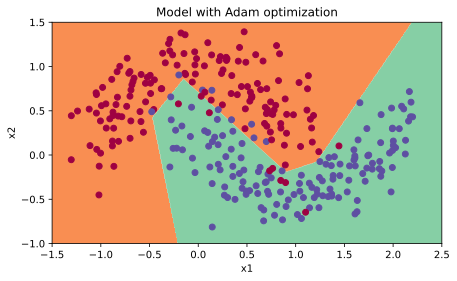

In [62]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-4'></a> 
Ось переклад:

### 7.4 - Досягнення схожої продуктивності різними методами

З міні-батч градієнтним спуском (Mini-batch GD) або міні-батч градієнтним спуском з моментумом (Mini-batch GD з Momentum) точність значно нижча, ніж у Адама. Але коли додається зниження швидкості навчання, будь-який з цих методів може досягти швидкості та точності, подібних до Адама.

У випадку Адама, зверніть увагу, що крива навчання досягає подібної точності, але швидше.

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >94.6%
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >95.6%
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
    </tr>
</table> 

Вітаю! Ти дійшов до кінця блокноту по методах оптимізації. Ось короткий підсумок того, що ти тепер вмієш робити:

* Застосовувати три різні методи оптимізації для своїх моделей
* Формувати міні-батчі для набору тренувальних даних
* Використовувати планування зниження швидкості навчання, щоб прискорити тренування

Чудова робота!
